In [1]:
!apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 9s (19.9 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
!which pdftotext

/usr/bin/pdftotext


In [3]:
!wget https://www.w3.org/WAI/ER/tests/xhtml/testfiles/resources/pdf/dummy.pdf
!pdftotext dummy.pdf - | head -n 10

--2023-11-30 07:06:01--  https://www.w3.org/WAI/ER/tests/xhtml/testfiles/resources/pdf/dummy.pdf
Resolving www.w3.org (www.w3.org)... 104.18.23.19, 104.18.22.19, 2606:4700::6812:1713, ...
Connecting to www.w3.org (www.w3.org)|104.18.23.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13264 (13K) [application/pdf]
Saving to: ‘dummy.pdf’

dummy.pdf           100%[===================>]  12.95K  --.-KB/s    in 0s      

2023-11-30 07:06:01 (55.4 MB/s) - ‘dummy.pdf’ saved [13264/13264]

Dummy PDF file



In [4]:

!pip install pdf2image
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.2 MB/s eta 0:00:00


In [5]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [6]:
#easyocr reader object specifically for the English language by passing ['en'] as an argument.
# Once you have this reader object, you can use its methods to perform OCR on images that contain English text.


reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [7]:
!wget https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf

--2023-11-30 07:07:13--  https://writing.colostate.edu/guides/documents/resume/functionalSample.pdf
Resolving writing.colostate.edu (writing.colostate.edu)... 129.82.210.34
Connecting to writing.colostate.edu (writing.colostate.edu)|129.82.210.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98553 (96K) [application/pdf]
Saving to: ‘functionalSample.pdf’

functionalSample.pd 100%[===================>]  96.24K  --.-KB/s    in 0.08s   

2023-11-30 07:07:13 (1.18 MB/s) - ‘functionalSample.pdf’ saved [98553/98553]



In [8]:
#load the pdf

images = convert_from_path('/content/sajaaaaResume.pdf')

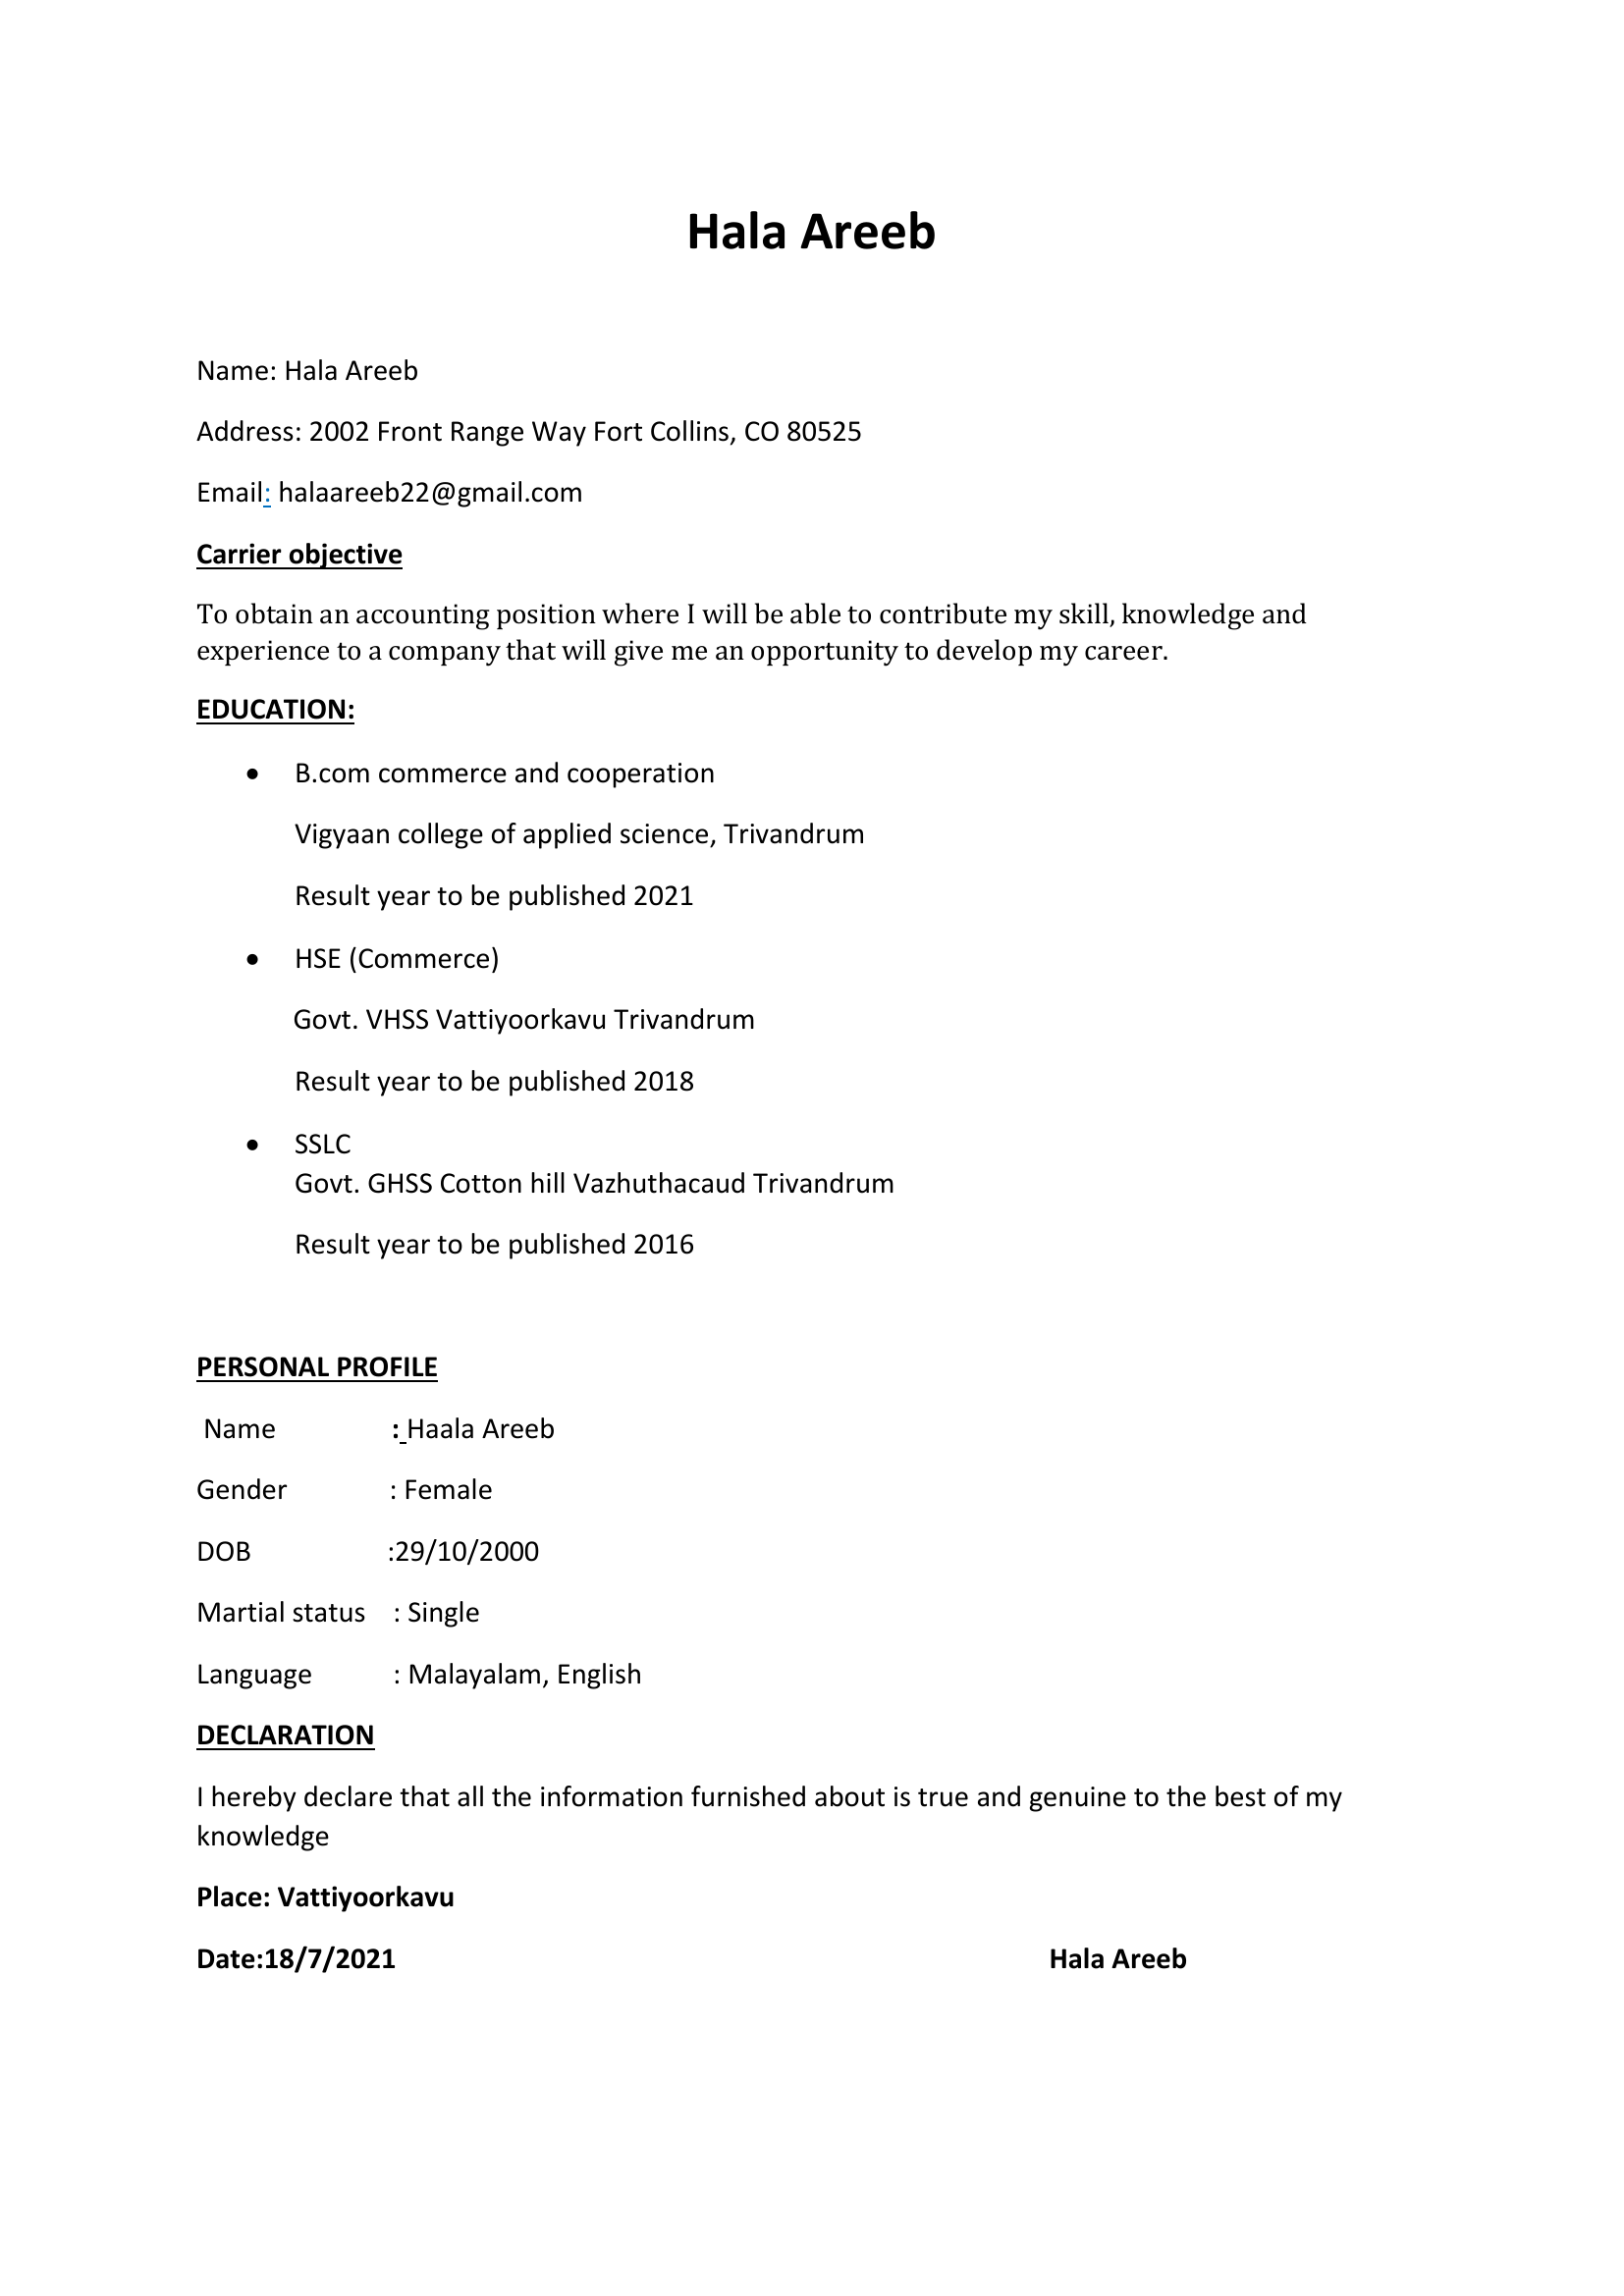

In [9]:
#IPython.display to display the image

from IPython.display import display, Image


# Display the first image from the list

display(images[0])

In [10]:
#to use the easyocr library to perform Optical Character Recognition (OCR) on the first image (images[0])
# obtained from the PDF using pdf2image. This code will extract text and its corresponding bounding boxes from the image.
#reader.readtext: Invokes the readtext function of the easyocr reader object (reader).
#np.array(images[0]): Converts the PIL Image object (images[0]) into a NumPy array.
#min_size=0: Minimum size of text regions to detect (default is 20).
#slope_ths=0.2: Slope threshold for text detection (default is 0.1).
#ycenter_ths=0.7: Y center threshold for text detection (default is 0.5).
#height_ths=0.6: Height threshold for text detection (default is 0.5).
#width_ths=0.8: Width threshold for text detection (default is 0.5).
#decoder='beamsearch': Decoder type to use for recognizing text (default is 'greedy').
#beamWidth=10: Width of the beam for beam search decoding (default is 5).
#This code is using easyocr to perform text detection and recognition on the image (images[0]).
# The readtext function returns a list of tuples, each containing the text, its bounding box coordinates, and other information.

#The variable bounds will contain the output with information about the detected text, including the text itself and its associated bounding boxes.


bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[696, 210], [960, 210], [960, 264], [696, 264]],
  'Hala Areeb',
  0.46354610868850377),
 ([[200, 364], [430, 364], [430, 394], [200, 394]],
  'Name: Hala Areeb',
  0.7773853360033719),
 ([[197, 421], [883, 421], [883, 462], [197, 462]],
  'Address: 2002 Front Range Way Fort Collins, CO 80525',
  0.7190023982571737),
 ([[199, 483], [599, 483], [599, 523], [199, 523]],
  'Email: halaareeb2z@gmail.com',
  0.5434609333130459),
 ([[197, 546], [417, 546], [417, 585], [197, 585]],
  'Carrier objective',
  0.7185206421976148),
 ([[197, 607], [1335, 607], [1335, 647], [197, 647]],
  'To obtain an accounting position where I will be able to contribute my skill, knowledge and',
  0.6475318750381062),
 ([[196, 643], [1191, 643], [1191, 685], [196, 685]],
  'experience to a company that will give me an opportunity to develop my career:',
  0.8134462068804746),
 ([[198, 708], [366, 708], [366, 740], [198, 740]],
  'EDUCATION:',
  0.9793583326222032),
 ([[297, 771], [733, 771], [733, 810], [297, 

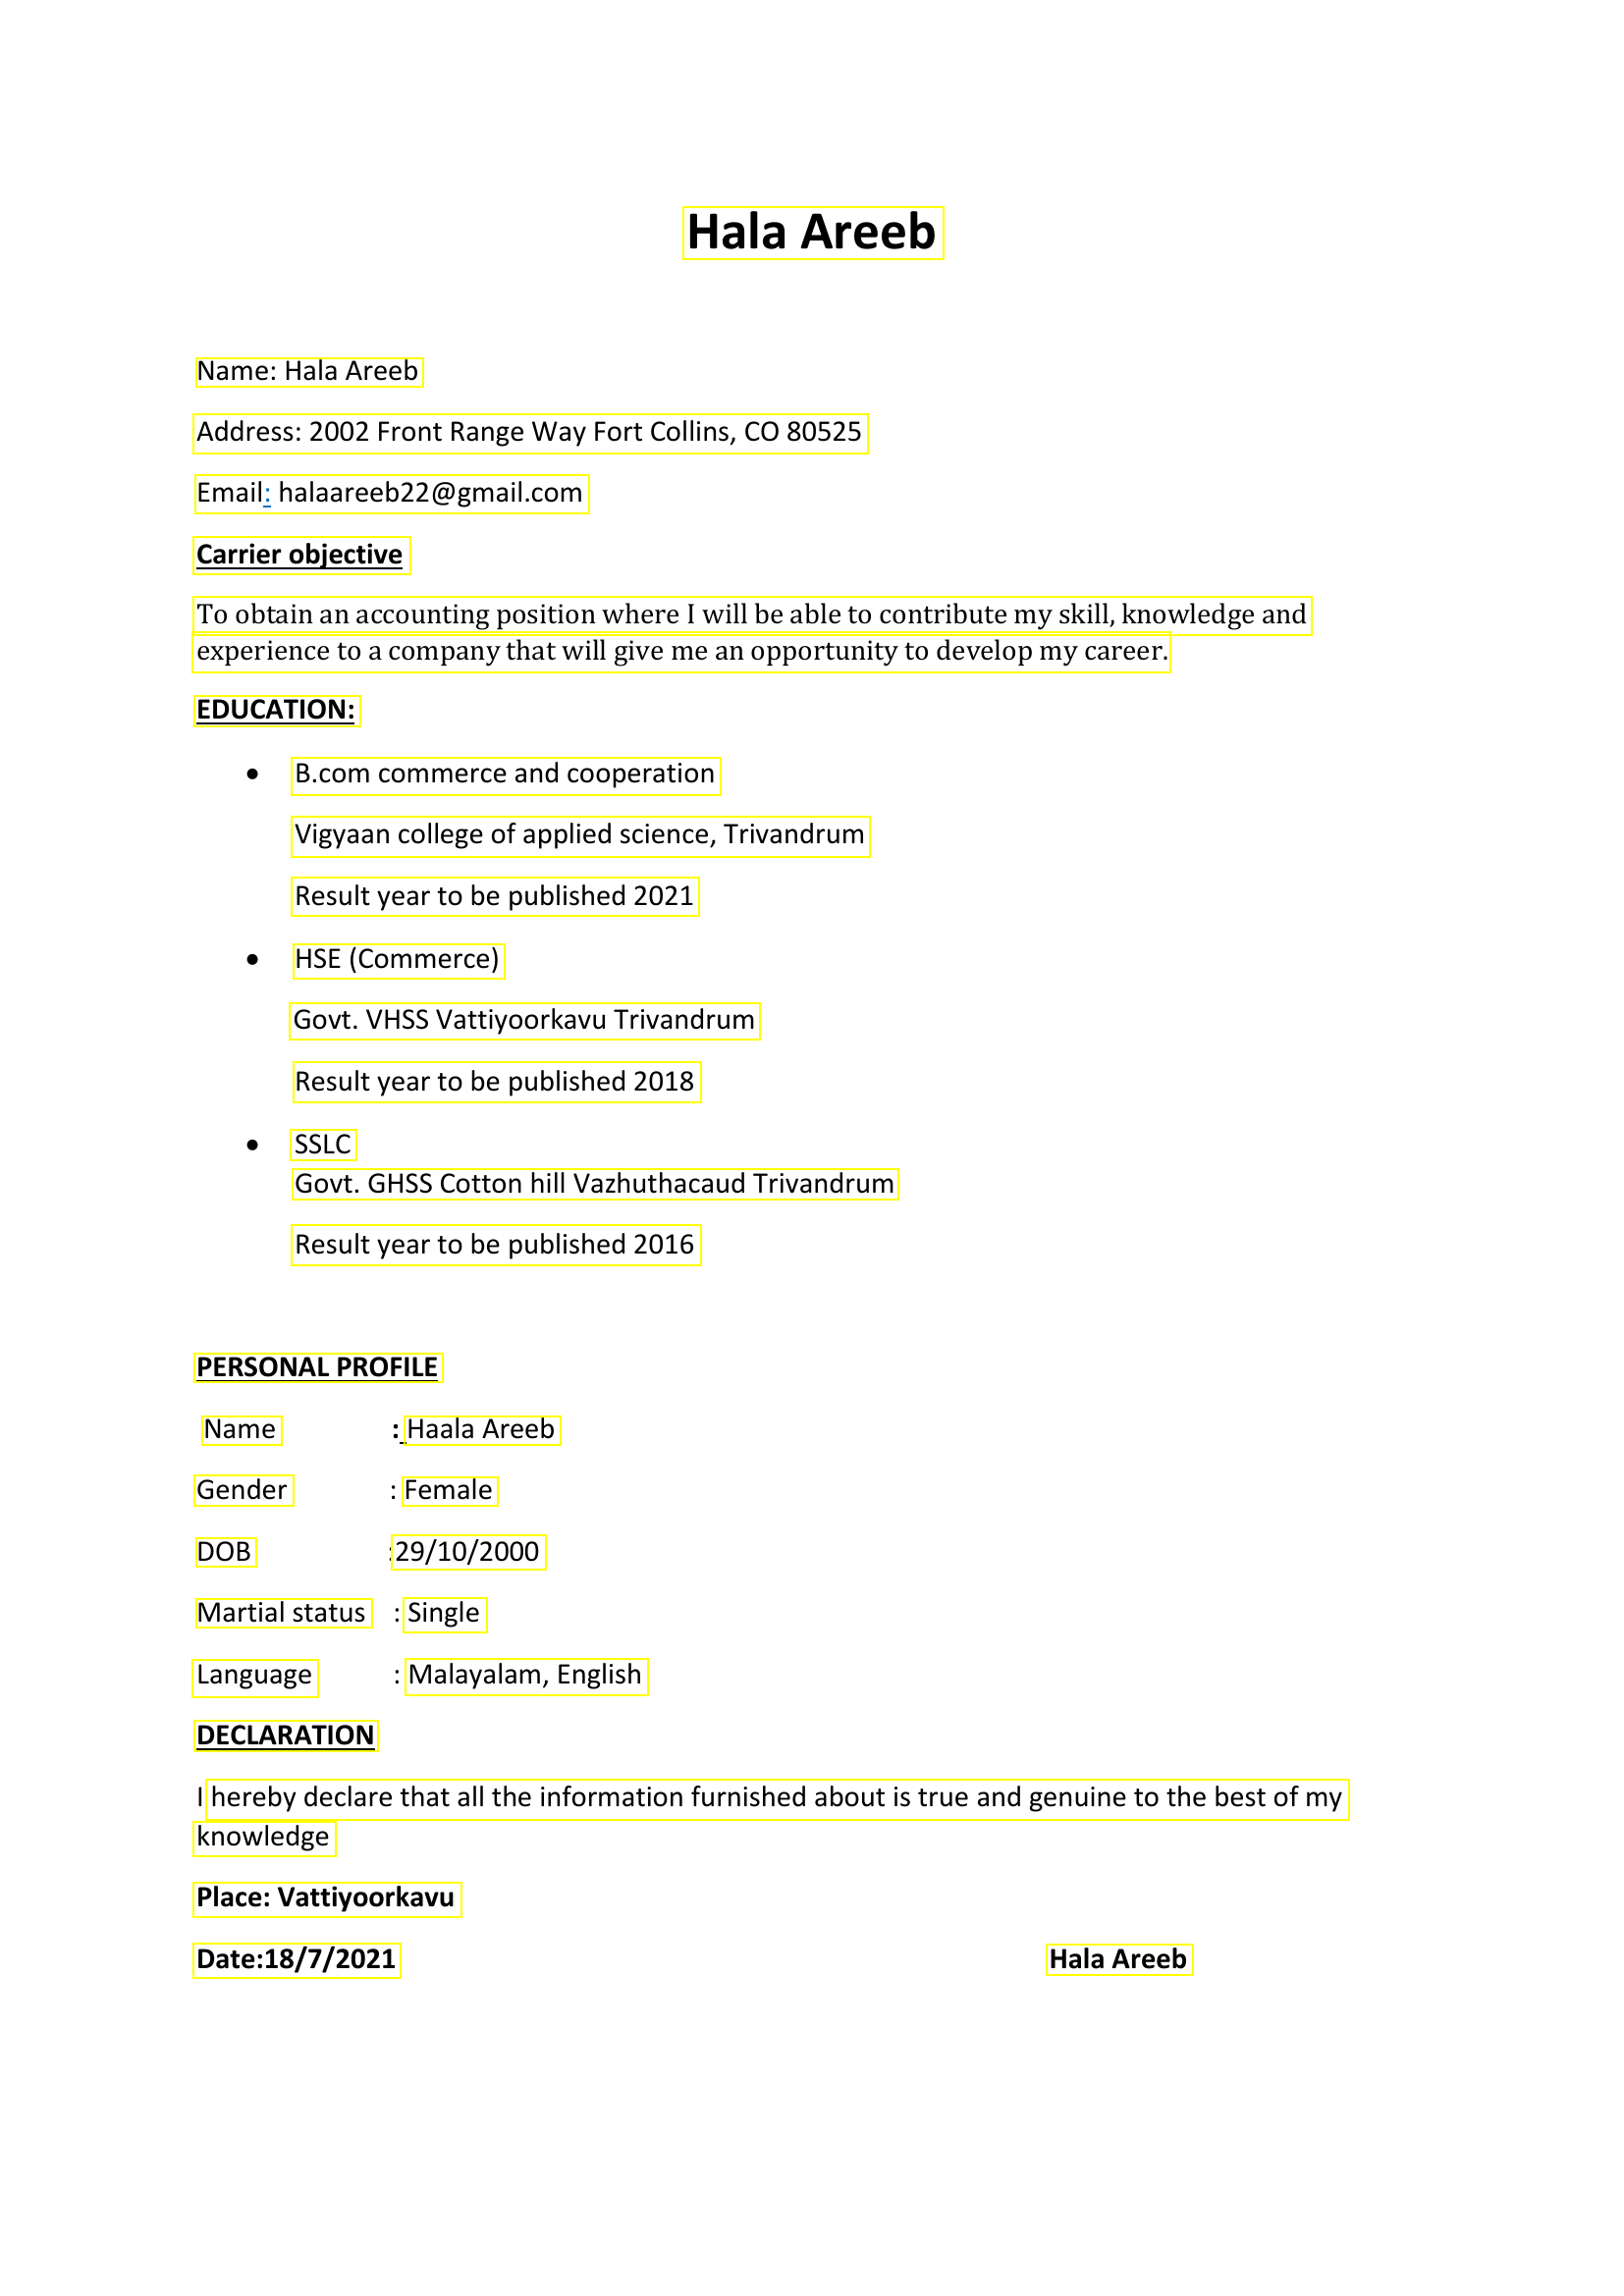

In [11]:
# draw_boxes that takes an image and a list of bounding boxes (bounds) and
#draws rectangles around the detected text using PIL.ImageDraw.

def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [15]:
main_Heading=bounds[0][-2]
main_Heading

'Hala Areeb'

In [16]:
name=bounds[1][-2]
name

'Name: Hala Areeb'

In [17]:
Address=bounds[2][-2]
Address

'Address: 2002 Front Range Way Fort Collins, CO 80525'

In [18]:
Email=bounds[3][-2]
Email

'Email: halaareeb2z@gmail.com'

In [19]:
career_Head=bounds[4][-2]
career_Head

'Carrier objective'

In [22]:
career_content=bounds[5][-2]+ " "+ bounds[6][-2]
career_content

'To obtain an accounting position where I will be able to contribute my skill, knowledge and experience to a company that will give me an opportunity to develop my career:'

In [23]:
Education_Main=bounds[7][-2]
Education_Main

'EDUCATION:'

In [38]:
Education1=bounds[8][-2]+ '\n' +bounds[9][-2]+ "\n"  +bounds[10][-2]

lines = Education1.split('\n')
for line in lines:
    print(line)


B.com commerce and cooperation
Vigvaan college of applied science, Trivandrum
Result year to be published 2021


In [39]:
Education2=bounds[11][-2]+ '\n' +bounds[12][-2]+ "\n"  +bounds[13][-2]

lines = Education2.split('\n')
for line in lines:
    print(line)

HSE (Commerce)
Govt: VHSS Vattiyoorkavu Trivandrum
Result year to be published 2018


In [40]:
Education3=bounds[14][-2]+ '\n' +bounds[15][-2]+ "\n"  +bounds[16][-2]

lines = Education3.split('\n')
for line in lines:
    print(line)

SSLC
Govt: GHSS Cotton hill Vazhuthacaud Trivandrum
Result year to be published 2016


In [41]:
personal_Head=bounds[17][-2]
personal_Head

'PERSONAL PROFILE'

In [46]:
personal_name=bounds[18][-2]+ " : "+ bounds[19][-2]
personal_name

'Name : Haala Areeb'

In [47]:
personal_gender=bounds[20][-2]+ " : "+bounds[21][-2]
personal_gender

'Gender : Female'

In [48]:
personal_dob=bounds[22][-2]+ " : "+bounds[23][-2]
personal_dob

'DOB : 29/10/2000'

In [49]:
personal_martial=bounds[24][-2]+ " : "+bounds[25][-2]
personal_martial

'Martial status : Single'

In [51]:
personal_language=bounds[26][-2]+ " : "+bounds[27][-2]
personal_language

'Language : Malayalam, English'

In [52]:
declaration=bounds[28][-2]
declaration

'DECLARATION'

In [55]:
declaration_content=bounds[29][-2]+ " "+bounds[30][-2]
declaration_content

'hereby declare that all the information furnished about is true and genuine to the best of my knowledge'

In [57]:
place=bounds[31][-2]
place

'Place: Vattiyoorkavu'

In [61]:
date=bounds[32][-2]
date

'Date:18/7/2021'

In [59]:
name=bounds[33][-2]
name

'Hala Areeb'

In [75]:
# concatenating several variables together with newline characters ("\n")
# to create a larger text block named data. This might be used to create a structured text content for a resume or a document.

data=main_Heading + "\n" + name+ "\n" + Address + "\n" + Email + "\n" +career_Head + "\n" + career_content+ "\n" +Education_Main + "\n"  + Education1 + "\n" + Education2 + "\n" +Education3 + "\n" + personal_Head + "\n" + personal_name +"\n" + personal_gender+ "\n" + personal_dob +"\n" + personal_martial + "\n" + personal_language + "\n" + declaration + "\n" + declaration_content + "\n" + place + "\n" + date + "\n" + name
data

'Hala Areeb\nHala Areeb\nAddress: 2002 Front Range Way Fort Collins, CO 80525\nEmail: halaareeb2z@gmail.com\nCarrier objective\nTo obtain an accounting position where I will be able to contribute my skill, knowledge and experience to a company that will give me an opportunity to develop my career:\nEDUCATION:\nB.com commerce and cooperation\nVigvaan college of applied science, Trivandrum\nResult year to be published 2021\nHSE (Commerce)\nGovt: VHSS Vattiyoorkavu Trivandrum\nResult year to be published 2018\nSSLC\nGovt: GHSS Cotton hill Vazhuthacaud Trivandrum\nResult year to be published 2016\nPERSONAL PROFILE\nName : Haala Areeb\nGender : Female\nDOB : 29/10/2000\nMartial status : Single\nLanguage : Malayalam, English\nDECLARATION\nhereby declare that all the information furnished about is true and genuine to the best of my knowledge\nPlace: Vattiyoorkavu\nDate:18/7/2021\nHala Areeb'

In [76]:
text=''
for i in range(len(data)):
  text = text + data[i][0]

print(text)


Hala Areeb
Hala Areeb
Address: 2002 Front Range Way Fort Collins, CO 80525
Email: halaareeb2z@gmail.com
Carrier objective
To obtain an accounting position where I will be able to contribute my skill, knowledge and experience to a company that will give me an opportunity to develop my career:
EDUCATION:
B.com commerce and cooperation
Vigvaan college of applied science, Trivandrum
Result year to be published 2021
HSE (Commerce)
Govt: VHSS Vattiyoorkavu Trivandrum
Result year to be published 2018
SSLC
Govt: GHSS Cotton hill Vazhuthacaud Trivandrum
Result year to be published 2016
PERSONAL PROFILE
Name : Haala Areeb
Gender : Female
DOB : 29/10/2000
Martial status : Single
Language : Malayalam, English
DECLARATION
hereby declare that all the information furnished about is true and genuine to the best of my knowledge
Place: Vattiyoorkavu
Date:18/7/2021
Hala Areeb


In [77]:
#load the English language model from spaCy using the en_core_web_sm package.
# The en_core_web_sm package contains a small English model trained on web data.


nlp=spacy.load('en_core_web_sm')

In [78]:
doc = nlp(text)

In [79]:
#The displacy.render function in spaCy is used to visualize the dependency parse or named entities in a text.

from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)